In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

In [4]:
# Membuat direktori untuk train, validation, dan test
train_dir = 'food-ingredients-image/split/train'

In [5]:
# Langkah 1: Baca class_names secara otomatis dari direktori dataset
# train_dir = 'path/to/train_dir'  # Ganti dengan direktori train Anda

# Buat generator sementara untuk membaca kelas
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Pastikan shuffle=False agar urutan kelas konsisten
)

# Ambil daftar kelas dari class_indices
class_names = list(train_generator.class_indices.keys())
print(f"Jumlah kelas: {len(class_names)}")
print(f"Daftar kelas: {class_names}")

Found 12240 images belonging to 35 classes.
Jumlah kelas: 35
Daftar kelas: ['Bawang Bombai', 'Bawang Merah', 'Bawang Putih', 'Brokoli', 'Cabai Hijau', 'Cabai Merah', 'Daging Sapi', 'Daging Unggas', 'Ikan', 'Jagung', 'Jahe', 'Jamur', 'Kacang Hijau', 'Kacang Merah', 'Kacang Panjang', 'Kacang Tanah', 'Kembang Kol', 'Kentang', 'Kikil', 'Kol', 'Labu Siam', 'Mie', 'Nasi', 'Petai', 'Sawi', 'Selada', 'Seledri', 'Telur Ayam', 'Telur Bebek', 'Tempe', 'Terong', 'Timun', 'Tomat', 'Usus', 'Wortel']


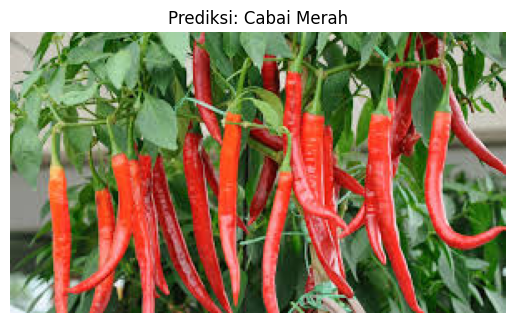


Prediksi Label: Cabai Merah


In [24]:
# Langkah 2: Load model TFLite
interpreter = tf.lite.Interpreter(model_path='convert_model/food_ingredients_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Verifikasi output shape
# print("Output shape:", output_details[0]['shape'])  # Harus [1, 75]

# Langkah 3: Fungsi Preprocessing gambar
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

# Langkah 4: Fungsi Inference
def predict_image(img_path):
    img = preprocess_image(img_path)
    interpreter.set_tensor(input_details[0]['index'], img)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data, axis=1)[0]
    return prediction, output_data

# Langkah 5: Inisialisasi GUI untuk memilih file
root = Tk()
root.withdraw()  
img_path = filedialog.askopenfilename(title="Pilih gambar untuk diuji", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])

if img_path:
    prediction, raw_output = predict_image(img_path)
   # print(f"Indeks prediksi: {prediction}")
   # print(f"Output probabilitas: {raw_output}")

    if prediction < len(class_names):
        # Tampilkan gambar dan hasil
        plt.imshow(image.load_img(img_path))
        plt.title(f"Prediksi: {class_names[prediction]}")
        plt.axis('off')
        plt.show()

        print(f"\nPrediksi Label: {class_names[prediction]}")
       # print(f"Output Probabilitas: {raw_output}")
    else:
        print(f"Error: Indeks prediksi ({prediction}) melebihi jumlah kelas ({len(class_names)}). Periksa class_names.")
else:
    print("Tidak ada file yang dipilih.")